In [1]:
import pandas as pd
import numpy as np

In [17]:
data=pd.read_csv("C:\\Users\\spoor\\Downloads\\amazon_products_dataset.csv")
df=pd.DataFrame(data)

In [18]:
df.head()

,title,brand,category,actual_price,discount_price,rating,rating_count
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0


In [19]:
df.tail()

,title,brand,category,actual_price,discount_price,rating,rating_count
1995,Smartphone with AMOLED Display,Dell,Monitor,24140.0,20202.0,3.0,16058.0
1996,Smart Fitness Watch,LG,Headphones,65449.0,64559.0,1.1,6655.0
1997,4K Action Camera,Dell,Smartphone,21358.0,18654.0,3.7,5308.0
1998,Noise Cancelling Earbuds,OnePlus,Smartwatch,35229.0,31061.0,2.2,19105.0
1999,Smartphone with AMOLED Display,Boat,Headphones,31662.0,31047.0,3.2,1064.0


In [20]:
df.shape

(2000, 7)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2000 non-null   object 
 1   brand           2000 non-null   object 
 2   category        1998 non-null   object 
 3   actual_price    1998 non-null   float64
 4   discount_price  1999 non-null   float64
 5   rating          1996 non-null   float64
 6   rating_count    1996 non-null   float64
dtypes: float64(4), object(3)
memory usage: 109.5+ KB


In [22]:
df['category'].unique()

array(['Laptop', 'Smartwatch', 'Headphones', 'Camera', 'Monitor',
       'Speaker', 'Tablet', 'Smartphone', nan], dtype=object)

In [23]:
df.isnull().sum()

title             0
brand             0
category          2
actual_price      2
discount_price    1
rating            4
rating_count      4
dtype: int64

In [26]:
df['category'] = df['category'].fillna("Unknown")
df['actual_price'] = df['actual_price'].fillna(df['actual_price'].median())
df['discount_price'] = df['discount_price'].fillna(df['discount_price'].median())
df['rating'] = df['rating'].fillna(df['rating'].median())
df['rating_count'] = df['rating_count'].fillna(df['rating_count'].median())

In [27]:
df.isnull().sum()

title             0
brand             0
category          0
actual_price      0
discount_price    0
rating            0
rating_count      0
dtype: int64

In [28]:
df.drop_duplicates()

,title,brand,category,actual_price,discount_price,rating,rating_count
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0
...,...,...,...,...,...,...,...
1995,Smartphone with AMOLED Display,Dell,Monitor,24140.0,20202.0,3.0,16058.0
1996,Smart Fitness Watch,LG,Headphones,65449.0,64559.0,1.1,6655.0
1997,4K Action Camera,Dell,Smartphone,21358.0,18654.0,3.7,5308.0
1998,Noise Cancelling Earbuds,OnePlus,Smartwatch,35229.0,31061.0,2.2,19105.0


In [29]:
numeric_cols = ['actual_price', 'discount_price', 'rating', 'rating_count']

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


In [30]:
df.reset_index(drop=True, inplace=True)


In [31]:
df.head()

,title,brand,category,actual_price,discount_price,rating,rating_count
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0


In [32]:
brand_most_products = df['brand'].value_counts().head(1)
print(brand_most_products)


brand
Boat    214
Name: count, dtype: int64


In [33]:
high_rated_products = df[(df['rating'] >= 4.5) & (df['rating_count'] >= 2000)]
print(high_rated_products)

                               title    brand    category  actual_price  \
4                Smart Fitness Watch  Samsung     Monitor       49224.0   
32                  4K Action Camera  OnePlus  Smartphone        7793.0   
51     Wireless Bluetooth Headphones     Dell  Headphones       61569.0   
52           Laptop with SSD Storage     Boat  Smartwatch       76286.0   
59                     Gaming Laptop  Samsung      Tablet       45250.0   
...                              ...      ...         ...           ...   
1949      Portable Bluetooth Speaker  OnePlus      Tablet       59325.0   
1970                  Android Tablet     Boat      Camera       20841.0   
1975   Wireless Bluetooth Headphones  Samsung  Smartwatch       31973.0   
1982   Wireless Bluetooth Headphones       HP      Camera       15343.0   
1988  Smartphone with AMOLED Display       LG      Tablet       29783.0   

      discount_price  rating  rating_count  
4            45017.0     4.9       14228.0  
32       

In [35]:
exp_prod=df['actual_price'].sort_values(ascending=False).head(5)
print(exp_prod)

1383    79993.0
1974    79869.0
1403    79857.0
1351    79853.0
42      79826.0
Name: actual_price, dtype: float64


In [37]:
avg_discount_brand = df.groupby('brand')['discount_price'].mean().sort_values(ascending=False)
print(avg_discount_brand)

brand
OnePlus    39090.550490
HP         38354.180583
Samsung    37931.150732
Dell       37570.078531
JBL        37380.390821
Sony       37102.337019
Mi         36542.437569
Boat       36353.115888
Apple      35889.731579
LG         35108.571154
Name: discount_price, dtype: float64


In [38]:
avg_price_category = df.groupby('category')['actual_price'].mean().sort_values(ascending=False)
print(avg_price_category)


category
Laptop        40822.874477
Camera        40352.246094
Monitor       39948.259259
Tablet        39943.815217
Speaker       39682.207843
Headphones    39576.147679
Smartwatch    38316.913934
Smartphone    37909.529412
Unknown       33610.500000
Name: actual_price, dtype: float64


In [39]:
df['discount_percent']=((df['actual_price'] - df['discount_price']) / df['actual_price']) * 100

In [40]:
df.head()

,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percent
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0,6.608957
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0,4.184451
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0,8.988944
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0,7.145786
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0,8.546644


In [42]:
def categorize_price(price):
    if price < 500:
        return "Budget"
    elif price < 2000:
        return "Midrange"
    else:
        return "Premium"

df['price_category'] = df['actual_price'].apply(categorize_price)

In [43]:
df.head()

,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percent,price_category
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0,6.608957,Premium
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0,4.184451,Premium
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0,8.988944,Premium
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0,7.145786,Premium
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0,8.546644,Premium


In [45]:
df['popularity_score']=df['rating'] * np.log(df['rating_count'] + 1)

In [46]:
df.head()

,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percent,price_category,popularity_score
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0,6.608957,Premium,19.924860
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0,4.184451,Premium,22.795289
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0,8.988944,Premium,14.879318
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0,7.145786,Premium,36.156019
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0,8.546644,Premium,46.858883


In [48]:
top10_popularity = df.sort_values(by='popularity_score', ascending=False).head(10)
print(top10_popularity)


                               title    brand    category  actual_price  \
1418  Smartphone with AMOLED Display  OnePlus      Laptop       22786.0   
297       Portable Bluetooth Speaker  Samsung      Camera       52713.0   
502    Wireless Bluetooth Headphones  Samsung      Camera       17858.0   
1400         High Resolution Monitor     Dell  Headphones       11025.0   
878          Laptop with SSD Storage    Apple  Smartwatch        4436.0   
1489         High Resolution Monitor    Apple      Laptop       21711.0   
848          High Resolution Monitor       HP  Smartphone       11660.0   
854       Portable Bluetooth Speaker  Samsung  Smartwatch       19284.0   
1625                   Gaming Laptop     Dell      Tablet       15099.0   
637                 4K Action Camera     Dell  Headphones       35058.0   

      discount_price  rating  rating_count  discount_percent price_category  \
1418         22301.0     5.0       18510.0          2.128500        Premium   
297          483

In [49]:
premium_discount = df[(df['price_category'] == 'Premium') & (df['discount_percent'] > 40)]
print(premium_discount)


                               title    brand    category  actual_price  \
6     Smartphone with AMOLED Display  OnePlus      Laptop       10026.0   
20                  4K Action Camera  OnePlus  Headphones        4378.0   
53          Noise Cancelling Earbuds      JBL      Camera        2335.0   
74           High Resolution Monitor     Boat     Monitor        5137.0   
104          High Resolution Monitor     Sony      Tablet        4933.0   
...                              ...      ...         ...           ...   
1793         High Resolution Monitor       Mi  Headphones        3620.0   
1834   Wireless Bluetooth Headphones     Boat  Headphones        5377.0   
1841        Noise Cancelling Earbuds  OnePlus  Smartwatch        5877.0   
1875   Wireless Bluetooth Headphones     Dell      Laptop       11037.0   
1879      Portable Bluetooth Speaker     Boat      Tablet        5447.0   

      discount_price  rating  rating_count  discount_percent price_category  \
6             5451.0

In [50]:
bluetooth_products = df[df['title'].str.contains("Bluetooth", case=False, na=False)]
print(bluetooth_products)


                              title    brand    category  actual_price  \
14       Portable Bluetooth Speaker  OnePlus      Camera       25516.0   
18       Portable Bluetooth Speaker     Sony     Monitor       73590.0   
21    Wireless Bluetooth Headphones  Samsung     Speaker       78689.0   
23       Portable Bluetooth Speaker       HP  Smartwatch        4342.0   
25    Wireless Bluetooth Headphones     Boat     Monitor       14689.0   
...                             ...      ...         ...           ...   
1975  Wireless Bluetooth Headphones  Samsung  Smartwatch       31973.0   
1979  Wireless Bluetooth Headphones     Sony     Monitor       65124.0   
1982  Wireless Bluetooth Headphones       HP      Camera       15343.0   
1985  Wireless Bluetooth Headphones       Mi  Smartwatch       50527.0   
1986     Portable Bluetooth Speaker  Samsung     Monitor       53328.0   

      discount_price  rating  rating_count  discount_percent price_category  \
14           24050.0     1.7    

In [51]:
percentile_30 = df['popularity_score'].quantile(0.70)


In [52]:
filtered_products = df[
    (df['rating'] >= 4.0) &
    (df['discount_percent'].between(20, 50)) &
    (df['popularity_score'] >= percentile_30)
]

print(filtered_products)


                               title    brand    category  actual_price  \
32                  4K Action Camera  OnePlus  Smartphone        7793.0   
94               Smart Fitness Watch       HP     Monitor       16289.0   
107          High Resolution Monitor      JBL  Smartphone        7308.0   
140                    Gaming Laptop     Sony      Tablet       11869.0   
162                   Android Tablet    Apple     Speaker       11918.0   
165    Wireless Bluetooth Headphones    Apple  Smartwatch        7654.0   
188       Portable Bluetooth Speaker       LG  Smartphone       10227.0   
215    Wireless Bluetooth Headphones    Apple      Camera       16855.0   
274   Smartphone with AMOLED Display     Sony     Speaker        6770.0   
404       Portable Bluetooth Speaker  Samsung      Laptop       14978.0   
469                   Android Tablet     Boat      Laptop        8287.0   
480          Laptop with SSD Storage       HP     Monitor         366.0   
482                 4K Ac

In [54]:
avg_disc_price=df.groupby('brand')['discount_percent'].mean()
print(avg_disc_price)

brand
Apple      12.721996
Boat       12.546502
Dell       11.165004
HP         11.501202
JBL        11.370137
LG         11.968668
Mi         10.162308
OnePlus    11.380987
Samsung     9.326064
Sony       10.381971
Name: discount_percent, dtype: float64


In [55]:
avg_pop_score=df.groupby('price_category')['popularity_score'].mean()
print(avg_pop_score)

price_category
Budget      38.147220
Midrange    23.660324
Premium     26.365816
Name: popularity_score, dtype: float64


In [60]:
high_avg_dis=df.groupby('category')['discount_price'].mean().sort_values(ascending=False)
print(avg_disc_price.head(1))

brand
Apple    12.721996
Name: discount_percent, dtype: float64


In [61]:
df['revenue_potential'] = df['actual_price'] * df['rating_count']


In [62]:
brand_revenue = df.groupby('brand')['revenue_potential'].sum().sort_values(ascending=False)
print(brand_revenue.head())


brand
HP         8.297444e+10
OnePlus    8.247380e+10
LG         8.156630e+10
Samsung    8.117230e+10
Sony       7.929952e+10
Name: revenue_potential, dtype: float64


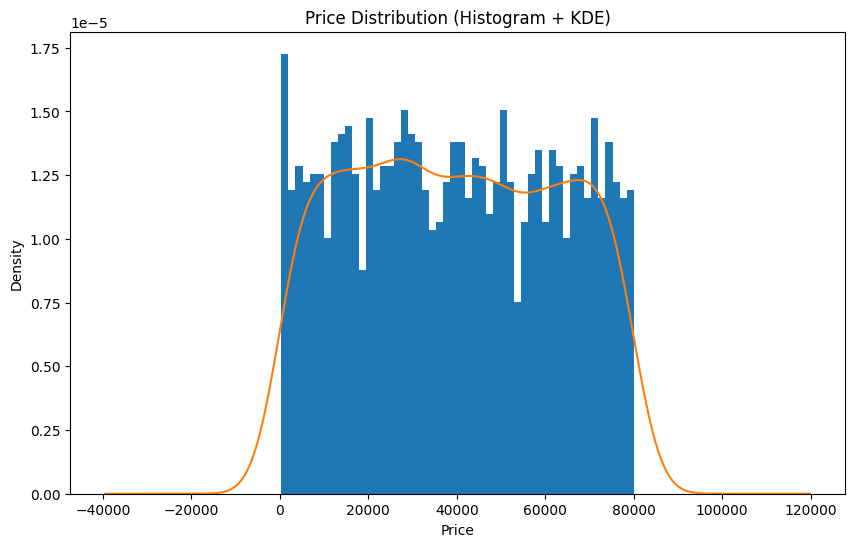

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df['actual_price'].plot(kind='hist', bins=50, density=True)
df['actual_price'].plot(kind='kde')
plt.xlabel("Price")
plt.title("Price Distribution (Histogram + KDE)")
plt.show()


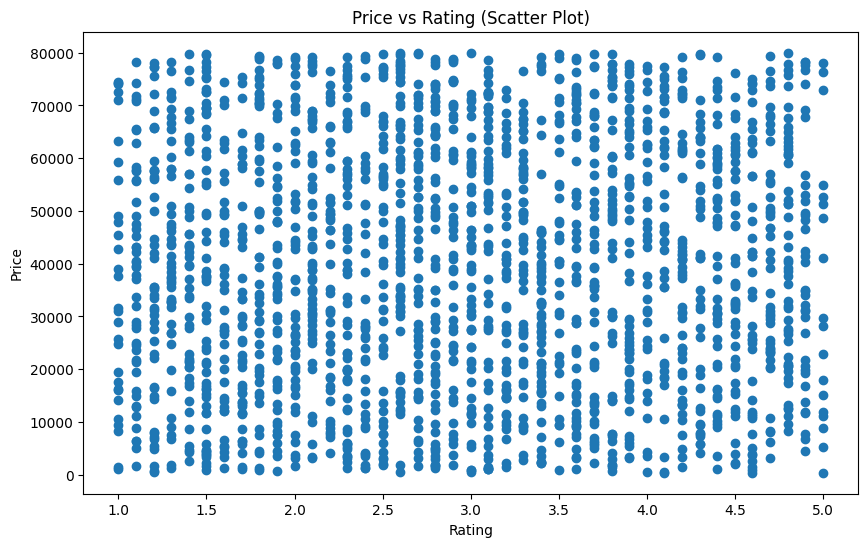

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(df['rating'], df['actual_price'])
plt.xlabel("Rating")
plt.ylabel("Price")
plt.title("Price vs Rating (Scatter Plot)")
plt.show()


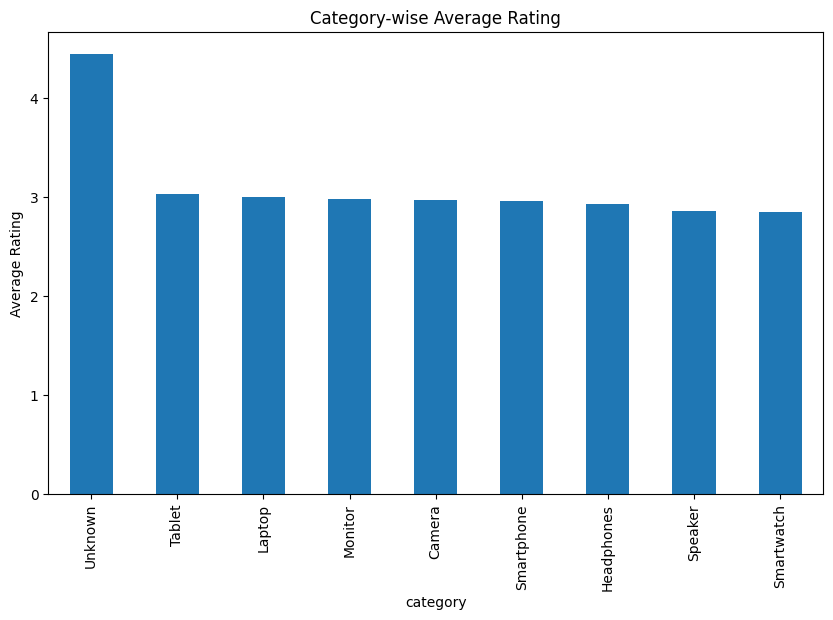

In [69]:
avg_rating_category = df.groupby('category')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
avg_rating_category.plot(kind='bar')
plt.ylabel("Average Rating")
plt.title("Category-wise Average Rating")
plt.show()


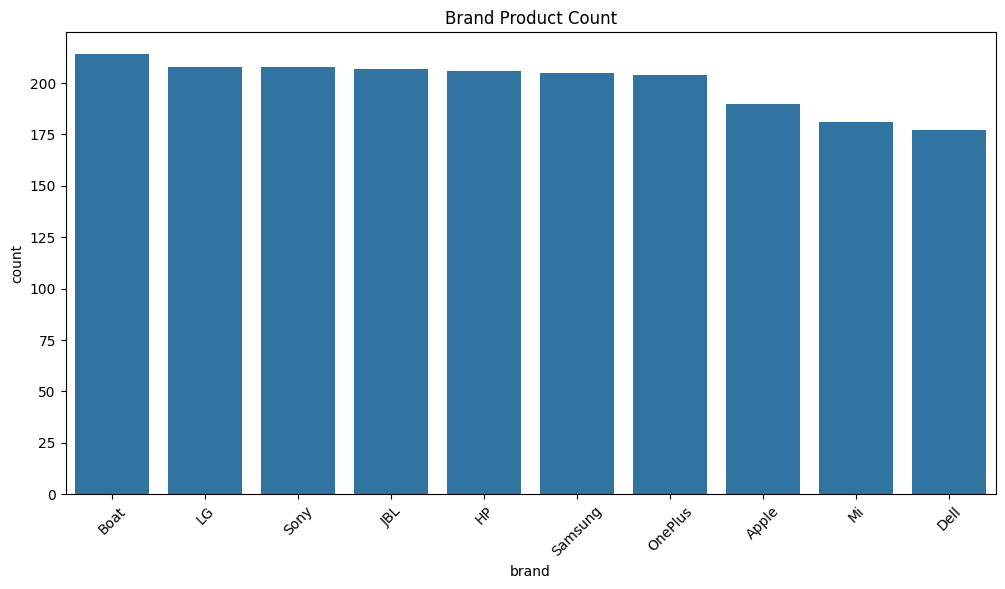

In [70]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='brand', order=df['brand'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Brand Product Count")
plt.show()


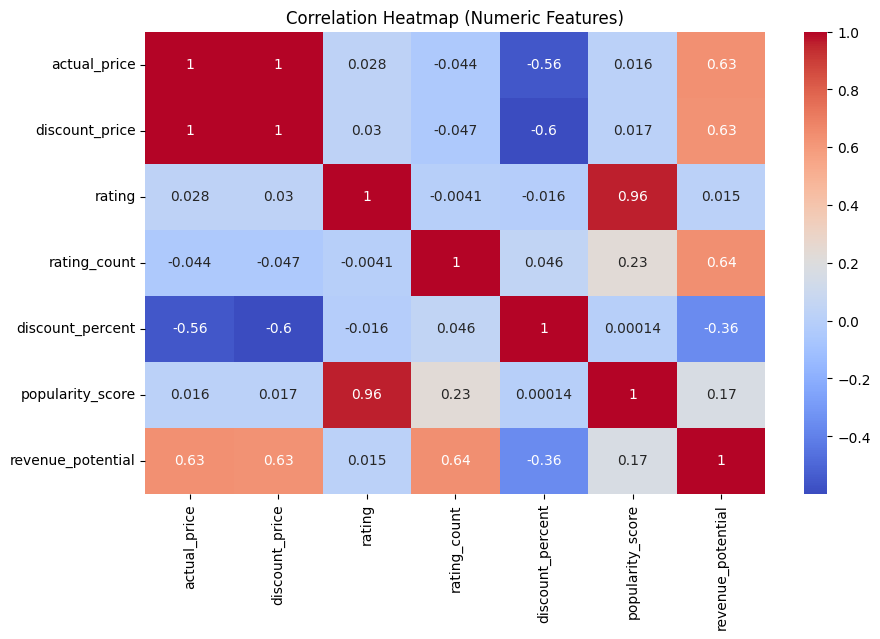

In [71]:
import seaborn as sns

plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


In [73]:
df.to_csv("C:\\Users\\spoor\\Downloads\\cleaned_Amazon_Products.csv",index=False)